## Shopping mall project - clustering of customers and trend indentification of sales
### By Dinesh Sonawane

### Problem Statement:
- PART 1: Segment (group/cluster) customers on the basis of buying better RFM (Recency Frequency Monetary)
- PART 2: Sales trends for day month season time by invoice number/customer ID
- PART 3: Higher sales trend item wise

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\HP\\OneDrive\\Desktop\\LearnBay\\4. Machine Learning\\Practice_Customer_Segmentation'

In [630]:
df = pd.read_excel('Customer_Segment.xlsx')
df.head(10)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,set 7 babushka nesting boxes,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,glass star frosted t-light holder,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,hand warmer union jack,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,hand warmer red polka dot,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,assorted colour bird ornament,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [631]:
# Obeserving the key features the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [632]:
# Check number of unique values in each coloumn
df.nunique()

InvoiceNo      25900
StockCode       4070
lower            953
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### PART 1: Segment (group/cluster) customers on the basis of buying better RFM (Recency Frequency Monetary)

In [633]:
# To calculate RFM keep significant coloumns only
df1 = df.drop(['StockCode','Description','Country','lower'], axis = 1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [634]:
# missing values
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [635]:
# The missing value in customer ID is due to cash sales.
# As we cannot track the true customer, we can remove the rows associated with null values of customer ID.
df1.dropna(axis = 0, how = 'any', subset = ['CustomerID'], inplace=True)


In [636]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [637]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [638]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [639]:
# Just to see how many items has unit price as 0
df1[df1['UnitPrice']==0]['UnitPrice'].count()

40

In [640]:
df1[df1['UnitPrice']==0].head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0


In [641]:
# Count number of items having negative quantity (or returned)
df1[df1['Quantity']<0]['Quantity'].count()

8905

In [642]:
df1[df1['Quantity']<-5000].value_counts()

InvoiceNo  Quantity  InvoiceDate          UnitPrice  CustomerID
C536757    -9360     2010-12-02 14:23:00  0.03       15838.0       1
C541433    -74215    2011-01-18 10:17:00  1.04       12346.0       1
C581484    -80995    2011-12-09 09:27:00  2.08       16446.0       1
dtype: int64

In [643]:
# Creating coloumn for total spend
df1['Total'] = df1['Quantity']*df1['UnitPrice']
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [644]:
# We can drop quantity and unit price coloumns
df1 = df1.drop(columns=['Quantity','UnitPrice'])
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [645]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   Total        406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 15.5+ MB


In [646]:
# Applying groupby function to calculate total amount with respect to single invoice
# Creating df2 dataframe with two coloumns Invoice No. and total
df2 = df1.drop(columns = ['InvoiceDate','CustomerID'])
df2.head()
               

,InvoiceNo,Total
0,536365,15.30
1,536365,20.34
2,536365,22.00
3,536365,20.34
4,536365,20.34


In [647]:
df2 = df2.groupby(['InvoiceNo']).sum()
df2.head()

,Total
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


In [648]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22190 entries, 536365 to C581569
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   22190 non-null  float64
dtypes: float64(1)
memory usage: 346.7+ KB


In [649]:
df2_final = df2.reset_index()
df2_final.head()

,InvoiceNo,Total
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85


In [650]:
df1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [651]:
df1 = df1.drop(columns=['Total'])
df1.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
1,536365,2010-12-01 08:26:00,17850.0
2,536365,2010-12-01 08:26:00,17850.0
3,536365,2010-12-01 08:26:00,17850.0
4,536365,2010-12-01 08:26:00,17850.0


In [652]:
# df1 has large number of rows becuase of duplicate invoice numbers
# So dropping duplicate invoice numbers
df1_final = df1.drop_duplicates(subset='InvoiceNo')
df1_final.head()

,InvoiceNo,InvoiceDate,CustomerID
0,536365,2010-12-01 08:26:00,17850.0
7,536366,2010-12-01 08:28:00,17850.0
9,536367,2010-12-01 08:34:00,13047.0
21,536368,2010-12-01 08:34:00,13047.0
25,536369,2010-12-01 08:35:00,13047.0


In [653]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22190 entries, 0 to 541894
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 693.4+ KB


In [654]:
# Now we have equal number of obervations in df1_final and df2_final
# We can merge this two dataframes
df_final = pd.merge(df1_final, df2_final, how = 'left', on = 'InvoiceNo')
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [655]:
# Now we can play with dataset, we can calculate RFM
# Lets calculate the oldest and latest date of invoice
max(df_final['InvoiceDate']) # Latest date

Timestamp('2011-12-09 12:50:00')

In [656]:
min(df_final['InvoiceDate'])  # Oldest date

Timestamp('2010-12-01 08:26:00')

In [657]:
# Just create latest date, 2 days after last date of invoice. If not done, for recent customer recency will be shown in hrs or min
import datetime as dt
latest_date = dt.datetime(2011,12,11)
latest_date

datetime.datetime(2011, 12, 11, 0, 0)

In [658]:
# We have set the latest date as 2011-12-11
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [659]:
# We will use aggregation function and caluclate Recency Frequency and Monetary values as per customer ID
RFM_score = df_final.groupby('CustomerID').agg({'InvoiceDate': lambda x:(latest_date - x.max()).days, 
                                                'InvoiceNo': lambda x: x.count(), 'Total': lambda x:x.sum()})
RFM_score.head()


,InvoiceDate,InvoiceNo,Total
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [660]:
# Renamimg of coloumns
RFM_score = RFM_score.rename(columns={'InvoiceDate':'Recency','InvoiceNo': 'Frequency', 'Total': 'Monetary'})
RFM_score = RFM_score.reset_index()
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [661]:
RFM_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   float64
 1   Recency     4372 non-null   int64  
 2   Frequency   4372 non-null   int64  
 3   Monetary    4372 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


In [662]:
RFM_score.describe()

,CustomerID,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.581199,5.075480,1898.459701
std,1722.390705,100.772139,9.338754,8219.345141
min,12346.000000,1.000000,1.000000,-4287.630000
25%,13812.750000,17.000000,1.000000,293.362500
50%,15300.500000,51.000000,3.000000,648.075000
75%,16778.250000,144.000000,5.000000,1611.725000
max,18287.000000,374.000000,248.000000,279489.020000


#### Check recency, frequency and monetery columns for normal disctribution

<Figure size 1080x720 with 0 Axes>

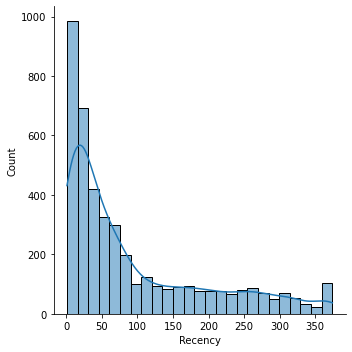

In [663]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.displot(RFM_score['Recency'], kde = True)

<Figure size 1080x1440 with 0 Axes>

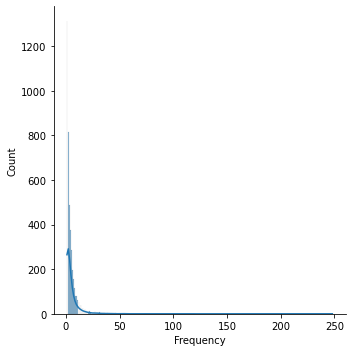

In [664]:
plt.figure(figsize = (15,20))
sns.displot(RFM_score['Frequency'], kde = True)

<Figure size 1080x1440 with 0 Axes>

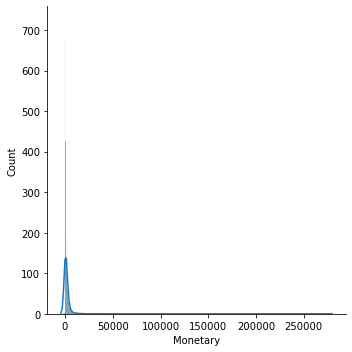

In [665]:
plt.figure(figsize = (15,20))
sns.displot(RFM_score['Monetary'], kde = True)

#### Looking above charts, it is clear that all the three featured are highly right skewed

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

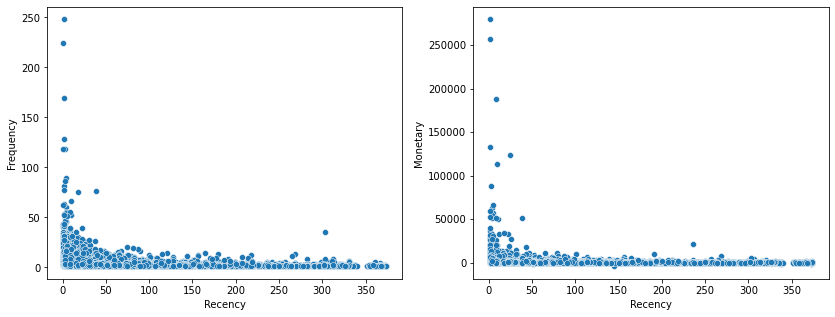

In [666]:
# Check frequency and monitary with respect to recency
fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.scatterplot(ax = axes[0], x = RFM_score['Recency'], y = RFM_score['Frequency'])
sns.scatterplot(ax = axes[1], x = RFM_score['Recency'], y = RFM_score['Monetary'])
plt.tight_layout

In [667]:
# Setting the benchmark using quntile method
RFM_score['Recency'].quantile(q = [0.25,0.50,0.75])

0.25     17.0
0.50     51.0
0.75    144.0
Name: Recency, dtype: float64

In [668]:
# We can change the quantile values as per requirement of data

In [669]:
RFM_score['Recency'].quantile(q = [0.30,0.65,0.85])

0.30     22.0
0.65     85.0
0.85    219.0
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Proportion'>

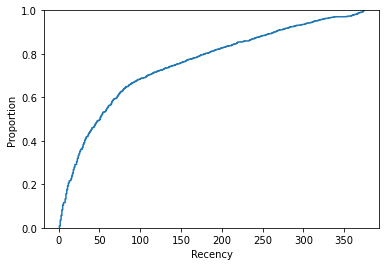

In [670]:
sns.ecdfplot(RFM_score['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Proportion'>

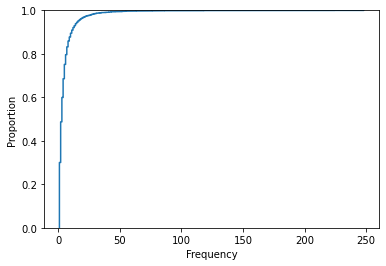

In [671]:
sns.ecdfplot(RFM_score['Frequency'])

In [672]:
RFM_score['Frequency'].quantile(q = [0.98,0.995,0.998])

0.980    27.000
0.995    52.000
0.998    78.032
Name: Frequency, dtype: float64

In [673]:
RFM_score['Monetary'].quantile(q = [0.65,0.95,0.998])

0.650     1079.02600
0.950     5625.00400
0.998    60253.65008
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Proportion'>

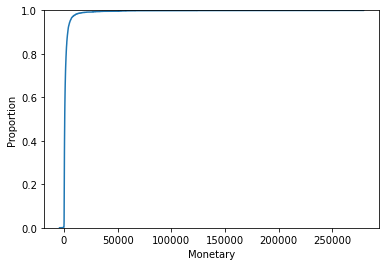

In [674]:
sns.ecdfplot(RFM_score['Monetary'])

In [675]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [676]:
quantile100 = RFM_score.quantile(q = [0.30,0.53,0.767])
quantile200 = RFM_score.quantile(q = [0.98,0.995,0.998])
quantile300 = RFM_score.quantile(q = [0.65,0.95,0.998])

In [677]:
# Now we can pass this quantiles to R F M score to customers
quantile100

,CustomerID,Recency,Frequency,Monetary
0.300,14110.300,22.0,1.0,337.37000
0.530,15479.260,54.0,3.0,705.79410
0.767,16882.557,156.0,6.0,1737.76684


In [678]:
# Recency
def R_scoring(x,p,d):
    if x<=d[p][0.3]:
        return 4
    elif x<=d[p][0.53]:
        return 3
    elif x<=d[p][0.767]:
        return 2
    else:
        return 1

In [679]:
# Frequency
def F_scoring(x,p,d):
    if x<=d[p][0.98]:
        return 1
    elif x<=d[p][0.995]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

In [680]:
# Monetary
def M_scoring(x,p,d):
    if x<=d[p][0.65]:
        return 1
    elif x<=d[p][0.95]:
        return 2
    elif x<=d[p][0.998]:
        return 3
    else:
        return 4

In [681]:
# Creation of new coloumn R F M and passing the quantile varaibles

In [682]:
RFM_score['R'] = RFM_score['Recency'].apply(R_scoring, args = ('Recency', quantile100))
RFM_score['F'] = RFM_score['Frequency'].apply(F_scoring, args = ('Frequency', quantile200))
RFM_score['M'] = RFM_score['Monetary'].apply(M_scoring, args = ('Monetary', quantile300))
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,2,0.00,1,1,1
1,12347.0,3,7,4310.00,4,1,2
2,12348.0,76,4,1797.24,2,1,2
3,12349.0,19,1,1757.55,4,1,2
4,12350.0,311,1,334.40,1,1,1


In [683]:
# Create RFM ID for the customer
RFM_score['RFM ID'] = RFM_score.R.map(str)+RFM_score.F.map(str)+RFM_score.M.map(str)
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM ID
0,12346.0,326,2,0.00,1,1,1,111
1,12347.0,3,7,4310.00,4,1,2,412
2,12348.0,76,4,1797.24,2,1,2,212
3,12349.0,19,1,1757.55,4,1,2,412
4,12350.0,311,1,334.40,1,1,1,111


In [684]:
# Create new colomn RFM sum
RFM_score['RFM sum'] = RFM_score['R']+RFM_score['F']+RFM_score['M']
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM ID,RFM sum
0,12346.0,326,2,0.00,1,1,1,111,3
1,12347.0,3,7,4310.00,4,1,2,412,7
2,12348.0,76,4,1797.24,2,1,2,212,5
3,12349.0,19,1,1757.55,4,1,2,412,7
4,12350.0,311,1,334.40,1,1,1,111,3


In [685]:
# Assigning loyality level
Lotality_level = ['Silver', 'Gold', 'Diamond', 'Platinum']

In [686]:
RFM_score['RFM sum'].quantile(q = [0.25,0.90,1])

0.25     4.0
0.90     7.0
1.00    12.0
Name: RFM sum, dtype: float64

In [687]:
# Apply the q-cut function
RFM_score['Lotality'] = pd.qcut(RFM_score['RFM sum'], q = 4, labels=Lotality_level)
RFM_score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM ID,RFM sum,Lotality
0,12346.0,326,2,0.00,1,1,1,111,3,Silver
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum
4,12350.0,311,1,334.40,1,1,1,111,3,Silver
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum


In [688]:
new_data = RFM_score[['RFM sum']]
new_data

,RFM sum
0,3
1,7
2,5
3,7
4,3
...,...
4367,3
4368,3
4369,6
4370,7


In [689]:
# applying the k-means algorithm

from sklearn.cluster import KMeans

SSE=[]

for K in range (1,30):
    Kmeans=KMeans(n_clusters=K,init="k-means++")
    Kmeans.fit(new_data)
    SSE.append(Kmeans.inertia_)


Text(0, 0.5, 'Inertia')

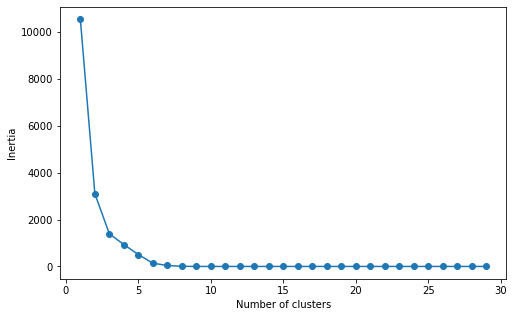

In [690]:
frame=pd.DataFrame({"cluster":range(1,30),"SSE":SSE})
plt.figure(figsize=(8,5))
plt.plot(frame["cluster"],frame["SSE"],marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")


In [691]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, init = "k-means++", max_iter = 100, random_state = 10)
y_km = km.fit_predict(new_data)
y_km

array([2, 1, 0, ..., 3, 1, 3])

In [692]:
seg_map={
    r'[1][1-2][2-3]':"Inactive",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    #r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-4][1]':'Target-upsell',
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFM_score["Segment"]=RFM_score["RFM ID"].replace(seg_map,regex=True)


In [693]:
RFM_score

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM ID,RFM sum,Lotality,Segment
0,12346.0,326,2,0.00,1,1,1,111,3,Silver,new customer
1,12347.0,3,7,4310.00,4,1,2,412,7,Platinum,Nurture
2,12348.0,76,4,1797.24,2,1,2,212,5,Gold,new customer
3,12349.0,19,1,1757.55,4,1,2,412,7,Platinum,Nurture
4,12350.0,311,1,334.40,1,1,1,111,3,Silver,new customer
...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,1,1,111,3,Silver,new customer
4368,18281.0,181,1,80.82,1,1,1,111,3,Silver,new customer
4369,18282.0,8,3,176.60,4,1,1,411,6,Diamond,Target-upsell
4370,18283.0,4,16,2094.88,4,1,2,412,7,Platinum,Nurture


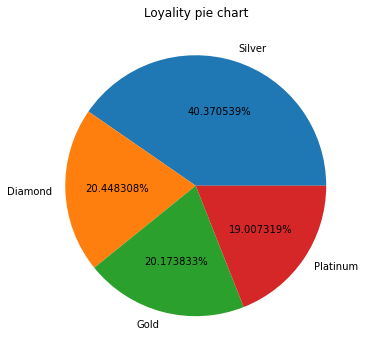

In [745]:
plt.figure(figsize=(6,6))
plt.pie(RFM_score['Lotality'].value_counts(), labels = RFM_score['Lotality'].value_counts().index,autopct = '%2f%%')
plt.title('Loyality pie chart')
plt.show()

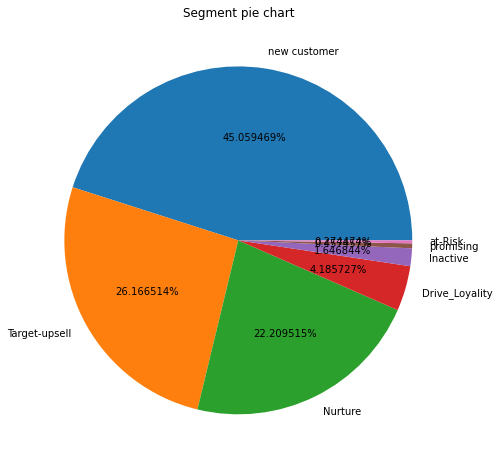

In [744]:
plt.figure(figsize=(8,8))
plt.pie(RFM_score['Segment'].value_counts(), labels = RFM_score['Segment'].value_counts().index,autopct = '%2f%%')
plt.title('Segment pie chart')
plt.show()

### PART 2: Sales trends for day month season time by invoice number/customer ID

In [694]:
# Check the original raw data
dfs = df.copy()
dfs.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [695]:
# Check the % of null values
dfs.isnull().sum()/len(df)*100


InvoiceNo       0.000000
StockCode       0.000000
lower          99.664888
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [696]:
# We can drop the lower column as it is almost filled with null values and null rows associated with CustomerID can be dropped
dfs.drop(columns=['lower'], inplace=True)
dfs.dropna(axis=0, how = 'any', inplace=True)
dfs.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [697]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [698]:
# Add coloumns in dataset for month and day
import datetime as dt
dfs['Month'] = dfs['InvoiceDate'].dt.month_name()
dfs['Day'] = dfs['InvoiceDate'].dt.day_name()
dfs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday


In [699]:
# Create Season column 
map_dict = {'December': 'Winter', 'January':'Winter', 'February':'Winter', 'March':'Summer', 'April':'Summer', 'May':'Summer',
            'June':'Summer','July':'Automn', 'August':'Automn', 'September':'Automn','October':'Automn', 'November':'Winter'}
dfs['Season'] = dfs['Month'].map(map_dict)
dfs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter


In [700]:
# Create the time column
dfs['Time'] = dfs['InvoiceDate'].dt.time
dfs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Season,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00


In [701]:
# Check min time and max time
print(dfs['Time'].min())
print(dfs['Time'].max())

06:10:00
20:38:00


In [702]:
# Create the time bucket considering min and max time of mall for the day
bins = [360,360+(1*180),360+(2*180),360+(3*180),360+(4*180),360+(5*180)]
labels = ['6to9', '9to12', '12to15', '15to18','18to21']
dfs['TimeBucket'] = pd.cut(dfs['Time'].apply(lambda x:((x.hour*60)+x.minute)),bins=bins, labels=labels)
dfs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Season,Time,TimeBucket
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9


In [703]:
# Create spend column
dfs['Spend'] = dfs['Quantity']*dfs['UnitPrice']
dfs.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Season,Time,TimeBucket,Spend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34


In [704]:
# Drop the non-required coloumns for sale pattern analysis
df3 = dfs.drop(columns=['InvoiceNo', 'StockCode', 'InvoiceDate','Quantity','UnitPrice'])
df3.head()

,Description,CustomerID,Country,Month,Day,Season,Time,TimeBucket,Spend
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,15.30
1,WHITE METAL LANTERN,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
2,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34


<AxesSubplot:xlabel='Day', ylabel='count'>

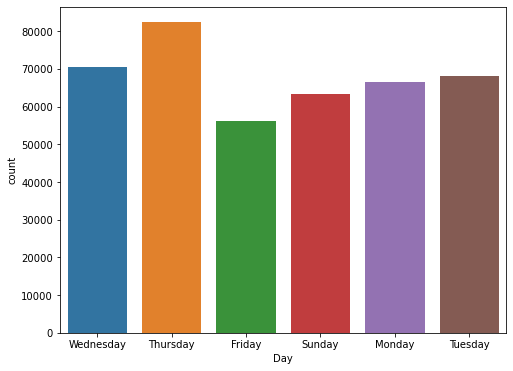

In [705]:
# Create countplot for week days
plt.figure(figsize = (8,6))
sns.countplot(x = df3['Day'])

<AxesSubplot:xlabel='Month', ylabel='count'>

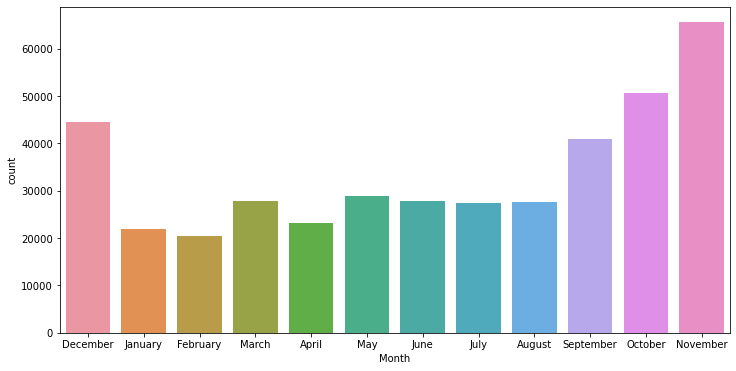

In [706]:
# Create countplot for months
plt.figure(figsize = (12,6))
sns.countplot(x = df3['Month'])

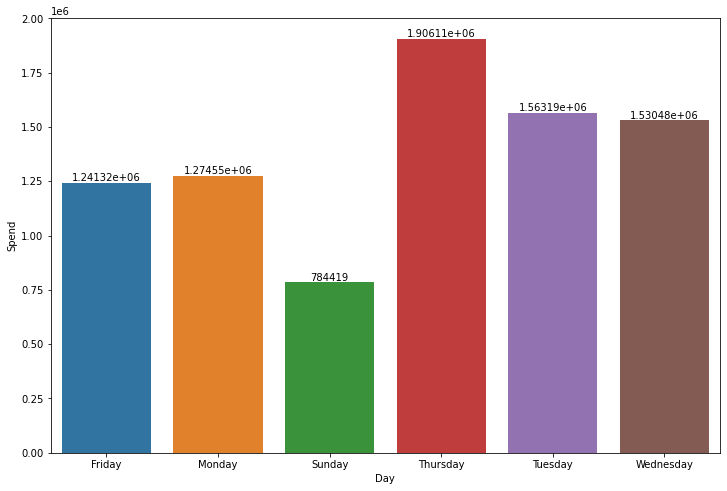

In [707]:
# Create plot of spend Vs day
df3_day_spend = pd.DataFrame(df3.groupby('Day')['Spend'].sum())
df3_day_spend.reset_index(inplace=True)
plt.figure(figsize = (12,8))
dayspend = sns.barplot(x = df3_day_spend['Day'], y = df3_day_spend['Spend'])
for container in dayspend.containers:
    dayspend.bar_label(container)

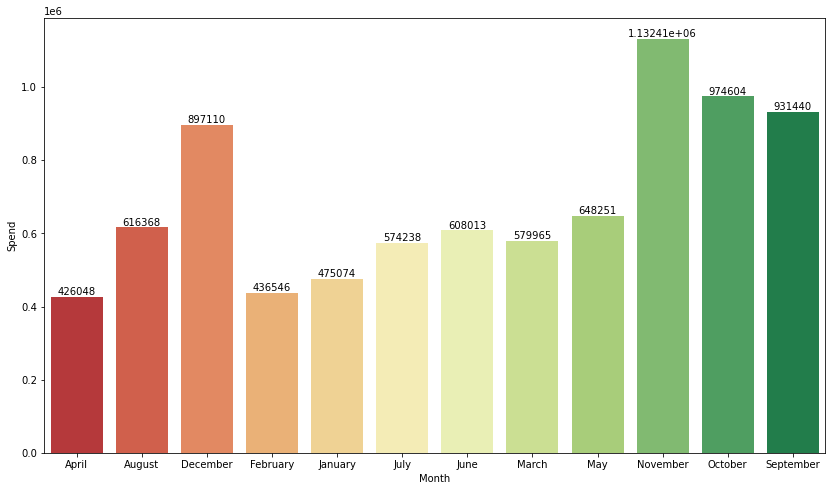

In [708]:
# Create plot of month vs spend
df3_month_spend = pd.DataFrame(df3.groupby('Month')['Spend'].sum())
df3_month_spend.reset_index(inplace=True)
plt.figure(figsize = (14,8))
monthspend = sns.barplot(x = df3_month_spend['Month'], y = df3_month_spend['Spend'], palette='RdYlGn')
for container in monthspend.containers:
    monthspend.bar_label(container)

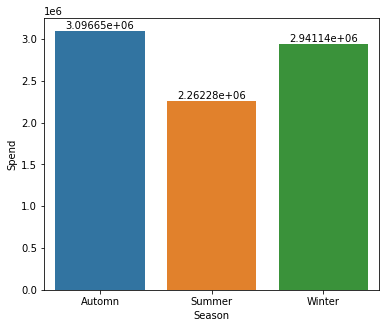

In [709]:
# Create plot of Season Vs spend
df3_season_spend = pd.DataFrame(df3.groupby('Season')['Spend'].sum())
df3_season_spend.reset_index(inplace=True)
plt.figure(figsize = (6,5))
seasonspend = sns.barplot(x = df3_season_spend['Season'], y = df3_season_spend['Spend'])
for container in seasonspend.containers:
    seasonspend.bar_label(container)

<AxesSubplot:xlabel='TimeBucket', ylabel='count'>

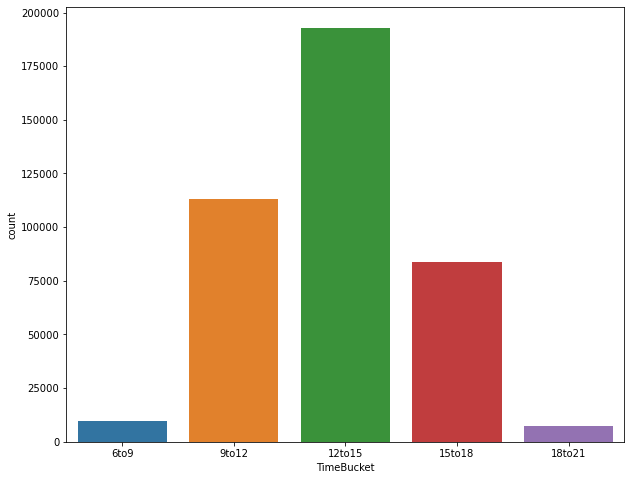

In [710]:
# Create countplot for TimeBucket
plt.figure(figsize=(10,8))
sns.countplot(x = df3['TimeBucket'])

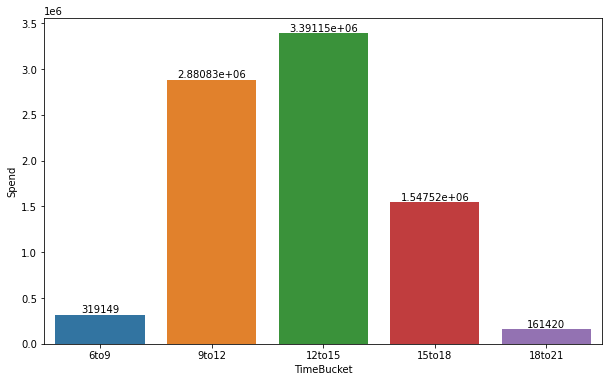

In [711]:
# Create plot of TimeBucket Vs spend
df3_time_spend = pd.DataFrame(df3.groupby('TimeBucket')['Spend'].sum())
df3_time_spend.reset_index(inplace=True)
plt.figure(figsize = (10,6))
timespend = sns.barplot(x = df3_time_spend['TimeBucket'], y = df3_time_spend['Spend'])
for container in timespend.containers:
    timespend.bar_label(container)

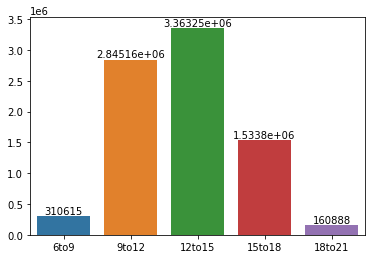

In [712]:
# Another method to create plot of TimeBucket Vs spend without adding any coloumns in main dataset
time_6to9 = df3[(dt.time(6)<df3['Time'])&(df3['Time']<dt.time(9))]['Spend'].sum()
time_9to12 = df3[(dt.time(9,1)<df3['Time'])&(df3['Time']<dt.time(12))]['Spend'].sum()
time_12to15 = df3[(dt.time(12,1)<df3['Time'])&(df3['Time']<dt.time(15))]['Spend'].sum()
time_15to18 = df3[(dt.time(15,1)<df3['Time'])&(df3['Time']<dt.time(18))]['Spend'].sum()
time_18to21 = df3[(dt.time(18,1)<df3['Time'])&(df3['Time']<dt.time(21))]['Spend'].sum()
time_buckets = {'6to9':time_6to9,'9to12':time_9to12,'12to15':time_12to15,'15to18':time_15to18, '18to21':time_18to21 }
x1 = list(time_buckets.keys())
y1 = list(time_buckets.values())
timeplot = sns.barplot(x = x1, y = y1)
for container in timeplot.containers:
    timeplot.bar_label(container)

### PART 3: Higher sales trend item wise

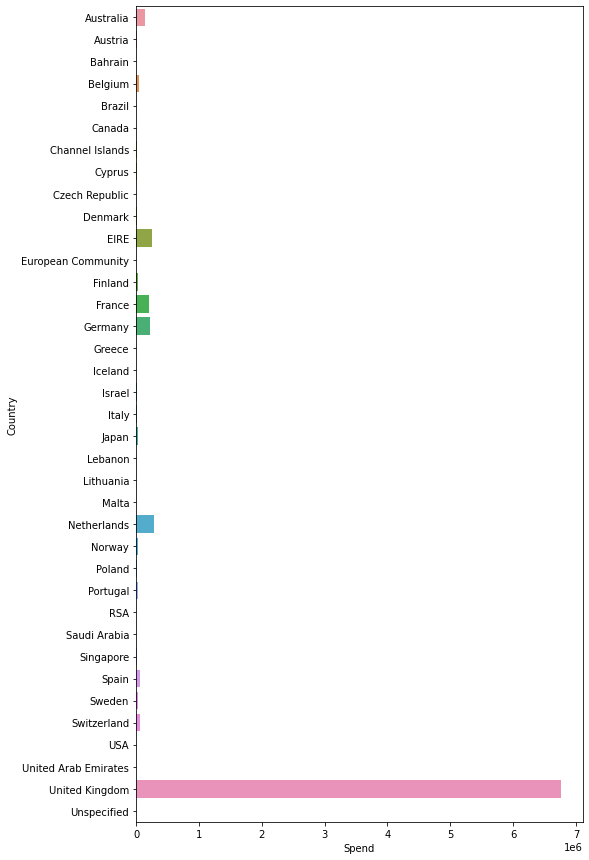

In [713]:
# Barplot for contry Vs spend
df3_country_spend = pd.DataFrame(df3.groupby('Country')['Spend'].sum())
df3_country_spend.reset_index(inplace=True)
plt.figure(figsize = (8,15))
countryspend = sns.barplot(y = df3_country_spend['Country'], x = df3_country_spend['Spend'], orient='h')

In [714]:
df3['Description'].unique().size

3896

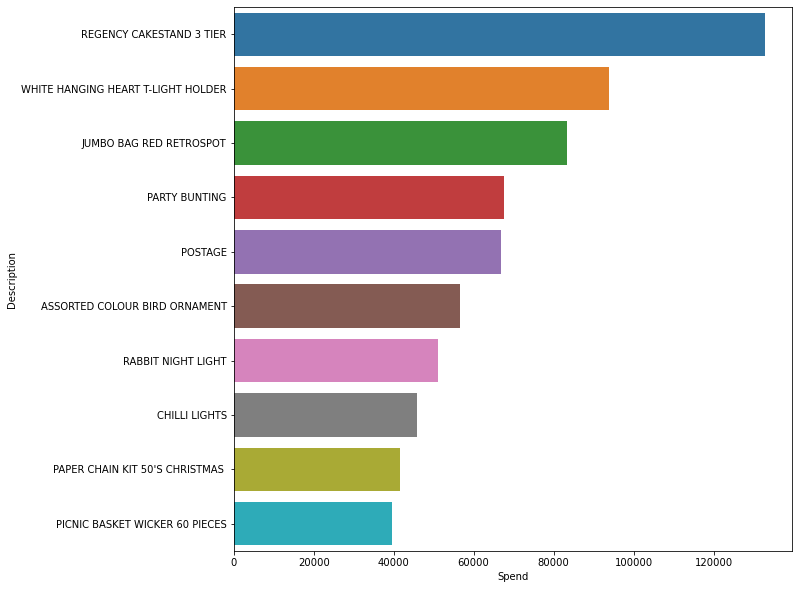

In [715]:
# Barplot for desciption Vs Spend
df3_desc_spend = pd.DataFrame(df3.groupby('Description')['Spend'].sum())
df3_desc_spend.reset_index(inplace=True)
df3_desc_spend.sort_values('Spend', inplace=True, ascending=False)
df3_desc_spend[:10]
plt.figure(figsize = (10,10))
descspend = sns.barplot(y = df3_desc_spend['Description'][:10], x = df3_desc_spend['Spend'], orient='h')

In [716]:
df3.head()

,Description,CustomerID,Country,Month,Day,Season,Time,TimeBucket,Spend
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,15.30
1,WHITE METAL LANTERN,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
2,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,22.00
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,December,Wednesday,Winter,08:26:00,6to9,20.34


<AxesSubplot:xlabel='count', ylabel='Country'>

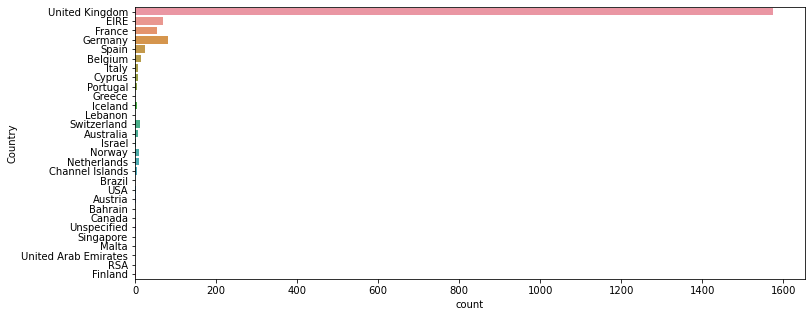

In [717]:
# Barplot to indentify in which contry max selling prodcut is sold
df4 = pd.DataFrame(df3.groupby('Description').get_group('REGENCY CAKESTAND 3 TIER'))
plt.figure(figsize=(12,5))
sns.countplot(y = df4['Country'])

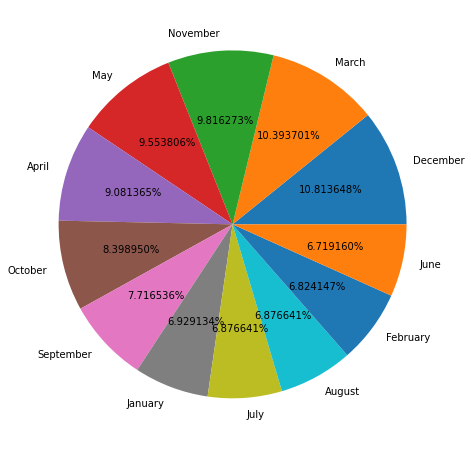

In [740]:
plt.figure(figsize=(8,8))
plt.pie(df4['Month'].value_counts(),labels = df4['Month'].value_counts().index,autopct='%2f%%')
plt.show()

# CONCLUSION

## PART 1: Segment (group/cluster) customers on the basis of buying better RFM (Recency Frequency Monetary)

#### 1. Looking at the scatter plot of frequency Vs recency, we can conclude that frequency has increased in recent days. Which indicates that more and more customers started visiting mall in recent days
#### 2. Looking at the scatter plot of monetary Vs recency, we can conclude that customers are started spending more in recent days
#### 3. First two points indicates that sales has picked up in recent days
#### 4. Looking at pie chart for loyality, silver catergoty is about 40% and looking at pie chart for segment, new customers are about 45%, which indicates that current marketing strategies are attracting new customers

### PART 2: Sales trends for day month season time by invoice number/customer ID

#### 1. Month over month spend barchart  clearly shows that money spent by customers was flat till august and it started picking up from Sept onwards. It indicates that if any new strategies adopted around Aug end, those are well effective
#### 2. Weekday spend graph shows that, customer are prominantly visiting on Thursday and customer count is very low on Sundays. More resources can be deployed on Thursday and resources can be optimized on Sunday. Rest of the working days shows flat spend.
#### 3. Additionally, recomendation is to increase resources for time slab of 12 to 15 which had major count of visiting customers

### PART 3: Higher sales trend item wise

#### 1."REGENCY CAKESTAND 3 TIER" was the highest sold item in given period of time and sold in UK 
#### 2. "REGENCY CAKESTAND 3 TIER" has flat sell across months with slightly higher sell shown in March and Dec months